# Milestone 1
Analyzing Language, Hashtags, Frequency, and Location -- focusing on a smaller data set from the Iran Information Operations

In [71]:
from pandas import Series, DataFrame, Panel
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import langdetect
from collections import Counter
import iso639 as pylang
import seaborn as sns
import itertools
from os import path
from PIL import Image
import os
from IPython.display import display, HTML
import plotly.plotly as py
import cufflinks as cf
from geopy.geocoders import Nominatim
from wordcloud import WordCloud

twitter_color = (0.114, 0.631, 0.949, 1.0)

## Import Data

In [3]:
filename = './Data/iranian_tweets_csv_hashed.csv'
iran = pd.read_csv(filename, delimiter=',')

users_filename = './Data/iranian_users_csv_hashed.csv'
iran_users = pd.read_csv(filename, delimiter=',')

## Language Analysis: Tweets
### *Sample data of tweets and their detected language*

In [4]:
for elem in iran.head(3)['tweet_text']:
    print(elem)
    print(langdetect.detect(elem))
    print()

@bellisarobz Ces photos illustrent parfaitement ce que ressentent les pères à un concert de One Direction http://t.co/YGdg8ihIh7
fr

@ParkerLampe An inquiry by congress confirms that ISIS is indeed a CIA creation http://t.co/eFRmFwYZTV
en

@hadeelhmaidi @wordpressdotcom CIA predict third terrorist attack after Sidney and Pakiistan in USA in 3 days http://t.co/IrPx7M223N
en



### *Detect language of tweets*
Just do the first 10,000 tweets for Milestone 1 because the Language Detection Library is slow.

In [5]:
tweet_languages = []
iran_tweets = iran.head(10000)['tweet_text']

for tweet_text in iran_tweets:
    lang = ''
    try:
        lang = langdetect.detect(tweet_text)
    except:
        lang = 'n/a'
    tweet_languages.append(lang)

### *Get counts of each language*

In [6]:
tweet_languages_count = Counter(tweet_languages)
print(tweet_languages_count)

Counter({'en': 2882, 'fr': 2420, 'ar': 1456, 'fa': 887, 'tr': 857, 'es': 521, 'ru': 324, 'ca': 76, 'n/a': 74, 'id': 72, 'so': 64, 'de': 63, 'ur': 53, 'hi': 42, 'it': 39, 'pt': 21, 'cy': 16, 'et': 15, 'sw': 15, 'af': 15, 'ro': 13, 'tl': 12, 'nl': 11, 'sl': 6, 'no': 6, 'hr': 6, 'sv': 5, 'da': 5, 'hu': 4, 'lv': 4, 'fi': 4, 'bg': 3, 'sq': 2, 'pl': 2, 'lt': 2, 'sk': 2, 'el': 1})


### *Plot language counts*

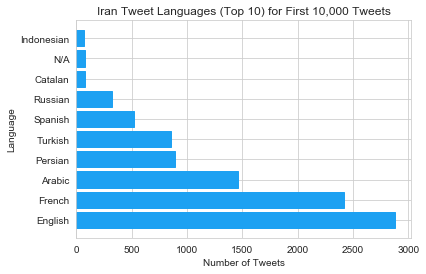

In [11]:
tweet_lang_types = []
tweet_lang_counts = []
sorted_tweet_languages_count = tweet_languages_count.most_common(10)

for lang, count in sorted_tweet_languages_count:
    tweet_lang_types.append(lang)
    tweet_lang_counts.append(count)

tweet_lang_types_long = []
for lang in tweet_lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        tweet_lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        tweet_lang_types_long.append('N/A')

# Labels
plt.title('Iran Tweet Languages (Top 10) for First 10,000 Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Language')

# Add Data
y_pos = np.arange(len(tweet_lang_types_long))
sns.set_style('whitegrid')
plt.barh(y_pos, tweet_lang_counts, color = twitter_color, edgecolor = twitter_color)
plt.yticks(y_pos, tweet_lang_types_long)

plt.show()

## Language Analysis: Accounts

### *Sample data of account languages*

In [8]:
for elem in iran_users.head(5)['account_language']:
    print(elem)

en
en
en
en
en


### *Get counts of each language*

In [9]:
languages_count = Counter(iran_users['account_language'])
print(languages_count)

Counter({'en': 1001558, 'ar': 41166, 'fr': 24029, 'es': 22281, 'fa': 21586, 'tr': 10009, 'en-gb': 2137, 'ru': 170})


### *Plot language counts*

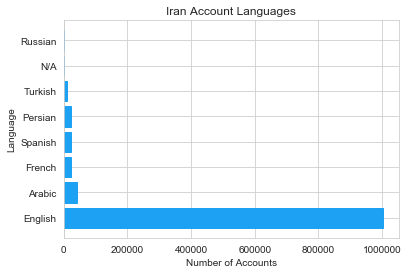

In [10]:
lang_types = []
lang_counts = []
sorted_languages_count = languages_count.most_common(10)

for lang, count in sorted_languages_count:
    lang_types.append(lang)
    lang_counts.append(count)

lang_types_long = []
for lang in lang_types:
    try:
        lang_long = pylang.languages.get(alpha2 = lang).name
        lang_types_long.append(lang_long)
    except:
        # For type n/a, will throw an error
        lang_types_long.append('N/A')

# Labels
plt.title('Iran Account Languages')
plt.xlabel('Number of Accounts')
plt.ylabel('Language')

# Add Data
y_pos = np.arange(len(lang_types_long))
sns.set_style('whitegrid')
plt.barh(y_pos, lang_counts, color = twitter_color, edgecolor = twitter_color)
plt.yticks(y_pos, lang_types_long)

plt.show()

## Frequency Analysis
### *Translate to correct date-time format*

In [15]:
iran['tweet_record_time'] = pd.to_datetime(iran['tweet_time'], format ='%Y-%m-%d %H:%M')

time = []
hour = []

# Get hour, minute, and second
for i in iran['tweet_record_time']:
    time.append(i.time())
iran['time'] = time

# Get hour from time
for i in iran['time']:
    hour.append(i.hour)
iran['hour'] = hour

### *Generate Histogram of Tweet Frequency*

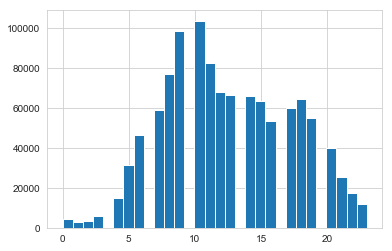

In [17]:
iran['hour'].hist(bins = 30)

## Location Analysis

### *Raw user location count*

In [55]:
# Use a different file for this part
ira_filename = './Data/ira_users_csv_hashed.csv'
ira_users = pd.read_csv(ira_filename, delimiter=',')

pd.crosstab(
    index = ira_users['user_reported_location'],
    columns = "count").sort_values(
    by = ['count'], ascending = False).head(10)

col_0,count
user_reported_location,
USA,670
Москва,206
United States,116
Atlanta,73
Санкт-Петербург,66
US,65
Питер,62
Россия,55
Moscow,48


### *Translate and reformat user location*
This had to be done manually because the users are each allowed to manually type their location on their profile.

In [56]:
ira_users['location'] = ira_users.user_reported_location.replace({  'Волгоград':'Volgograd, Russia','Egypt':'N/A, Egypt',
                                                            'Ростов':'Rostov-on-Don, Russia','Baltimore, MD':'Baltimore, United States','London':'London, England','Jacksonville':'Jacksonville, United States',
                                                            'Moscow':'Moscow, Russia', 'Петербург':'Saint Petersburg, Russia','New York City':'New York, United States', 'Arizona':'Phoenix, United States',
                                                            'Germany':'N/A, Germany','Санкт-Петербург, Россия':'Saint Petersburg, Russia','Нижний Новгород':'Nizhny Novgorod, Russia','Тверь':'Tver, Russia','Киев':'Kiev, Ukraine',
                                                            'دمشق':'Damascus, Syria','spb':'SPB','Estados Unidos':'N/A, United States','Estados Unidos':'Volgograd, Russia',
                                                            'Казань':'Kazan, Russia','Екатеринбург':'Yekaterinburg, Russia', 'СПБ':'Saint Petersburg, Russia','СПб':'Saint Petersburg, Russia','Washington, D.C.': 'Washington DC, United States',
                                                            'Houston, TX':'Houston, United States','Miami, FL': 'Miami, United States','Texas, USA':'Texas, United States','Washington': 'Washington DC, United States',
                                                            'France': 'N/A, France','Phoenix':'Phoenix, United States','Chicago, IL':'Chicago, United States','Washington, DC': 'Washington D.C, United States',
                                                            'Philadelphia':'Philadelphia, United States'  ,'Chicago':'Chicago, United States','Washington, D.C': 'Washington DC, United States',
                                                            'Чебоксары':'Cheboksary, Russia', 'سوريا':'N/A, Syria','Syria':'N/A, Syria', 'New-York':'New York, United States', 
                                                            'Atlanta' :'Atlanta, United States','LA' :'Los Angeles, United States','Los Angeles' :'Los Angeles, United States','Los Angeles, CA' :'Los Angeles, United States',
                                                            'Boston':'Boston, United States','Омск':'Omsk, Russia','New York, NY':'New York, United States',
                                                            'New York':'New York, United States', 'NY':'New York, United States', 'Новгород':'Veliky Novgorod, Russia', 
                                                            'Москва, Россия':'Moscow, Russia','Новосибирск': 'Novosibirsk, Russia', 'Россия' :'N/A, Russia' ,'Russia' :'N/A, Russia' ,
                                                            'New York, USA' :'New York, United States'   ,'Atlanta, GA' :'Atlanta, United States',
                                                            'Lichfield\t':'Lichfield, England', 'Istanbul via Liverpool': 'Liverpool, England', 'United States':'N/A, United States', 
                                                            'US':'N/A, United States', 'USA':'N/A, United States', 'Москва':'Moscow, Russia',
                                                            'Моscow':'Moscow, Russia', 'Санкт-Петербург':'Saint Petersburg, Russia', 'Питер':'Saint Petersburg, Russia'})

In [57]:
# For accounts without city specified, assume to be the capital of the country
ira_users['location'] = ira_users.location.replace({'N/A, Egypt':'Cairo, Egypt', 'N/A, Syria':'Damascus, Syria', 'N/A, France':'Paris, France', 'N/A, Germany':'Berlin, Germany'    ,'N/A, Russia':'Moscow, Russia'  ,'N/A, United States':'Washington, D.C., United States','Washington DC, United States':'Washington, D.C., United States', 'Washington D.C, United States':'Washington, D.C., United States' })

### [*Map the city distribution on a world map*](http://localhost:8888/view/Frequency%20Analysis/mymap.html)

In [58]:
location_count = pd.crosstab(index = ira_users['location'],
                             columns = "count").sort_values(
                             by = ['count'], ascending = False)

In [59]:
location_count.reset_index(level = 0, inplace = True)

In [60]:
# Get the cities with more than 5 users and exclude invalid cities (MSK, SPB)
most_frequent = location_count[(location_count['count'] > 5) & (location_count['location'] != 'МSK') & (location_count['location']!='SPB')]

### *Parse country from location*

In [61]:
most_frequent['country'] = [str(x).split(',')[-1].strip() for x in most_frequent['location']]

### *Get the country distribution*

In [62]:
countries_cnt = most_frequent.groupby(['country']).sum().sort_values(by='count', ascending = False)
countries_cnt.reset_index(level=0, inplace=True)

### [*Map the country distribution on a world map*](http://localhost:8888/view/Frequency%20Analysis/mymap_countries.html)

In [63]:
geolocator = Nominatim(user_agent="twitter_bot_analysis")

In [64]:
# Get the long and lat coordinates of countries
countries_cnt['long'] = [geolocator.geocode(str(x)).longitude for x in countries_cnt['country']]
countries_cnt['lat'] = [geolocator.geocode(str(x)).latitude for x in countries_cnt['country']]

### Generate Map

In [65]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[0,0], zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(countries_cnt)):
   folium.Circle( location=[countries_cnt.iloc[i]['lat'], countries_cnt.iloc[i]['long']], popup=countries_cnt.iloc[i]['country'] + ' : ' + str(countries_cnt.iloc[i]['count']),
      radius=float(countries_cnt.iloc[i]['count']*1000), color='crimson', fill_color='crimson', fill=True).add_to(m)
 
# Save it as html
m.save('mymap_countries.html')

## Hashtag Analysis

### *Extract hashtags from csv*

In [68]:
tagsIran = iran.hashtags.dropna()
htIran = []
for x in tagsIran:
    for y in x.replace('[', '').replace(']', '').replace(',', '').split():
        htIran.append("#" + y)

iranFreq = {}
for word in htIran:
    if word in iranFreq:
        iranFreq[word] += 1
    else:
        iranFreq[word] = 1
hashDFIran = pd.DataFrame(list(iranFreq.items()), columns=['Hashtag', 'Frequency'])
hashDFIran2 = hashDFIran.sort_values(by=['Frequency'], ascending = False)[:10]

### *Generate word cloud*

In [72]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
cwd = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
twitter_mask = np.array(Image.open(path.join(cwd, "TwitterLogo.png")))

f = {}
for a, x in hashDFIran.values:
    f[a] = x

wc3 = WordCloud(background_color="white", mask=twitter_mask, contour_color='steelblue', width=1200, height=800)
wc3.generate_from_frequencies(frequencies=f)

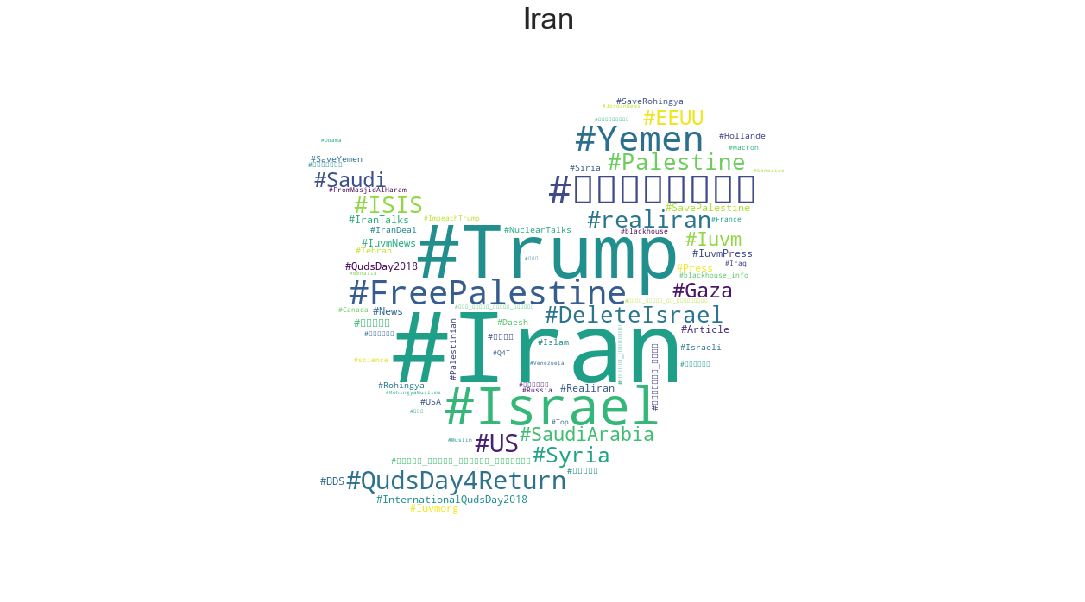

In [73]:
f = plt.figure(figsize=(20, 10))
#f.add_subplot(121)
plt.imshow(wc3)
plt.title('Iran', size=30)
plt.axis("off")
plt.show()

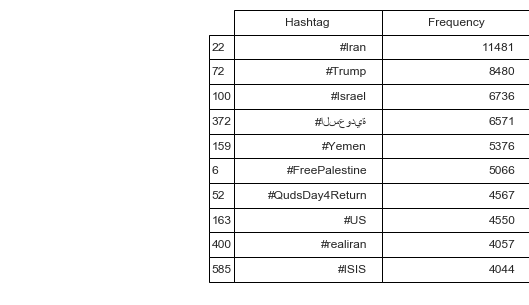

In [74]:
f = plt.figure(figsize=(18, 5))
htTable = f.add_subplot(122)
font_size=12
bbox=[0.45, 0, 0.65, 1.0]
htTable.axis('off')
mpl_table = htTable.table(cellText = hashDFIran2.values, rowLabels = hashDFIran2.index, bbox=bbox, colLabels=hashDFIran2.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
plt.show()

## **Future Questions**

#### *Language Analysis*
* What can the common tweet languages tell us about which countries Iran might be targeting with their information operations?
* What will this data look like:
  * compared to the other countries
  * once we are able to process 100% of the data from each country
  
#### *Location Analysis*
* From the location analysis, we can see that most accounts reported to be within US though they are from foreign information operations. 
* In the future, we can further study the differences between accounts reported to be domestic and foreign.
  1. Do accounts reported to be domestic have higher user interaction?
  2. Do they target US issues? What languages do they use? 
  3. Do they post according to US time zone? 
* From the frequency analysis, we notice significant difference in the tweeting time accross countries
* In the future, we want to know
  1. Do tweets posted in a particular time have higher user interaction?
  2. Can we differentiate tweets targeting their regional issues from those targeting US issues from the post time?

#### *Hashtag Analysis*
* How does the diversity in hashtags compare between countries?
* What does this say about whom these countries may be targeting?